In [1]:
"""
# Honor Statement

Name: Zhuoran Wu

E-mail: <zw118@georgetown.edu>

Platform: Windows

In accordance with the class policies and Georgetown's Honor Code,
I certify that, with the exceptions of the class resources and those
items noted below, I have neither given nor received any assistance
on this project.
"""

"\n# Honor Statement\n\nName: Zhuoran Wu\n\nE-mail: <zw118@georgetown.edu>\n\nPlatform: Windows\n\nIn accordance with the class policies and Georgetown's Honor Code,\nI certify that, with the exceptions of the class resources and those\nitems noted below, I have neither given nor received any assistance\non this project.\n"

In [51]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

from matplotlib import ticker

%matplotlib inline
warnings.filterwarnings("ignore")

In [36]:
# ReLu Function
relu = np.vectorize(lambda z: np.fmax(0,z))

# Softmax Function
softmax = lambda z: z/np.sum(z, axis = 1, keepdims=True)

def ff_nn_2_ReLu(x, W1, W2, b1, b2, V, c):
    a1 = x.dot(W1) + b1
    h1 = relu(a1)
    o1 = np.round(softmax(h1),2)
    a2 = o1.dot(W2) + b2
    # h2 = relu(a2)
    a3 = a2.dot(V) + c
    out = np.round(softmax(a3),2)
    return out

W1 = np.array([[1, -1, 0], [0, 0, 0.5]])
W2 = np.array([[1., -1.],[0, -1.], [0, 0]])
b1 = np.array([0, 0, 1.])
b2 = np.array([1., -1.])
V = np.array([[1., 0, -1], [1., 0, -1.]])
c = np.array([1., 0, 0])

X = np.array([[1., 0], [-1., -1.], [0, 0], [1., -1.]])

print("""
X:\n{X}
W1:\n{W1}
W2:\n{W2}
b1:\n{b1}
b2:\n{b2}
V:\n{V} 
c:\n{c}
""".format(X = X, W1 = W1, W2 = W2, b1 = b1, b2 = b2, V = V,c = c))

ff_nn_2_ReLu(X, W1, W2, b1, b2, V, c)


X:
[[ 1.  0.]
 [-1. -1.]
 [ 0.  0.]
 [ 1. -1.]]
W1:
[[ 1.  -1.   0. ]
 [ 0.   0.   0.5]]
W2:
[[ 1. -1.]
 [ 0. -1.]
 [ 0.  0.]]
b1:
[0. 0. 1.]
b2:
[ 1. -1.]
V:
[[ 1.  0. -1.]
 [ 1.  0. -1.]] 
c:
[1. 0. 0.]



array([[1.  , 0.  , 0.  ],
       [0.33, 0.  , 0.67],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [38]:
class Relu:
    @staticmethod
    def activation(z):
        z[z < 0] = 0
        return z


class Sigmoid:
    @staticmethod
    def activation(z):
        return 1 / (1 + np.exp(-z))
    
class Network:
    def __init__(self, dimensions, activations):
        """
        :param dimensions: (tpl/ list) Dimensions of the neural net. (input, hidden layer, output)
        :param activations: (tpl/ list) Activations functions.

        """
        
        self.n_layers = len(dimensions)
        self.loss = None
        self.learning_rate = None

        # Weights and biases are initiated by index. For a one hidden layer net you will have a w[1] and w[2]
        self.w = {}
        self.b = {}

        # Activations are also initiated by index. For the example we will have activations[2] and activations[3]
        self.activations = {}

        for i in range(len(dimensions) - 1):
            self.w[i + 1] = np.random.randn(dimensions[i], dimensions[i + 1]) / np.sqrt(dimensions[i])
            self.b[i + 1] = np.zeros(dimensions[i + 1])
            self.activations[i + 2] = activations[i]
            
        # print(self.n_layers)
        # print(self.w)
        # print(self.b)
        # print(self.activations)
    
    def _feed_forward(self, x):
        """
        Execute a forward feed through the network.

        :param x: (array) Batch of input data vectors.
        :return: (tpl) Node outputs and activations per layer. 
                 The numbering of the output is equivalent to the layer numbers.
        """

        # w(x) + b
        z = {}

        # activations: f(z)
        a = {1: x}  # First layer has no activations as input. The input x is the input.

        for i in range(1, self.n_layers):
            # current layer = i
            # activation layer = i + 1
            z[i + 1] = np.dot(a[i], self.w[i]) + self.b[i]
            a[i + 1] = self.activations[i + 1].activation(z[i + 1])

        return z, a
    
    def predict(self, x):
        """
        :param x: (array) Containing parameters
        :return: (array) A 2D array of shape (n_cases, n_classes).
        """
        _, a = self._feed_forward(x)
        return a[self.n_layers]

np.random.seed(1)
nn = Network((3, 2, 3), (Relu, Sigmoid))
nn.predict(np.array([[1., -1., 0, 1.], [0, -1., 0, -1.]]))
# nn.predict(np.array([[1., 0], [-1., -1.], [0, 0], [1., -1.]]))

ValueError: shapes (2,4) and (3,2) not aligned: 4 (dim 1) != 3 (dim 0)

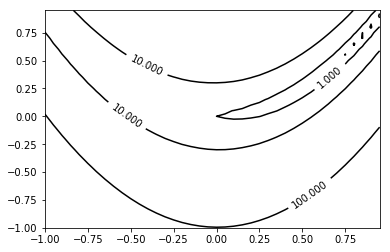

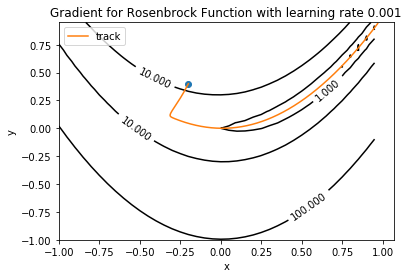

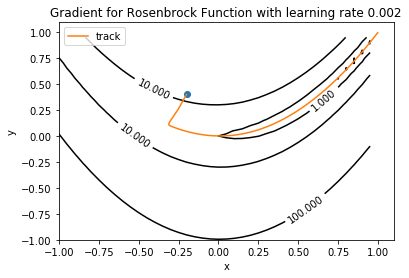

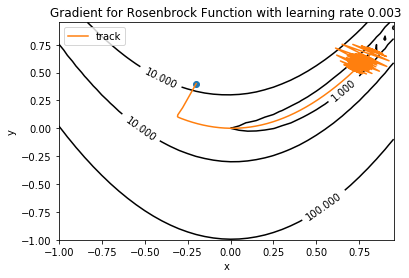

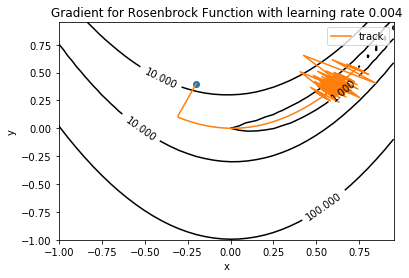

In [87]:
# Gra

def f(x, y):
    return (1 - x) ** 2 + 100 * (y - x * x) ** 2


def grad_f(x, y):
    return np.matrix([[2 * x - 2 + 400 * x * (x * x - y)],
                      [200 * (y - x * x)]])


def delta_grad(x, y, learning_rate):
    g = grad_f(x, y)
    delta = learning_rate * g
    return delta


def grad_descent(x, iterations, learning_rate, xv, yv):
    for t in range(iterations):
        delta = delta_grad(x[0, 0], x[1, 0], learning_rate)
        # if abs(delta[0, 0]) < 0.00001 and abs(delta[1, 0]) < 0.00001:
        #     break
        x = x - delta
        xv.append(x[0, 0])
        yv.append(x[1, 0])

        
def draw_graph(iterations, learning_rate):
    delta = 0.05
    x = np.arange(-1.0, 1.0, delta)
    y = np.arange(-1.0, 1.0, delta)
    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.contourf(X, Y, f(X, Y), 5, alpha=0, cmap=plt.cm.hot)
    C = plt.contour(X, Y, f(X, Y), 8, locator=ticker.LogLocator(), colors='black', linewidth=0.01)
    plt.clabel(C, inline=True, fontsize=10)

    x = np.matrix([[-0.2], [0.4]])
    xv = [x[0, 0]]
    yv = [x[1, 0]]
    plt.plot(x[0, 0], x[1, 0], marker='o')

    grad_descent(x, iterations, learning_rate, xv, yv)
    plt.plot(xv, yv, label='track')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient for Rosenbrock Function with learning rate {lr}'.format(lr = learning_rate))
    plt.legend()
    plt.show()

    
plt.figure()
plt.contourf(X, Y, f(X, Y), 5, alpha=0, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, locator=ticker.LogLocator(), colors='black', linewidth=0.01)
plt.clabel(C, inline=True, fontsize=10)
    
draw_graph(6000, 0.001)
draw_graph(6000, 0.002)
draw_graph(6000, 0.003)
draw_graph(6000, 0.004)

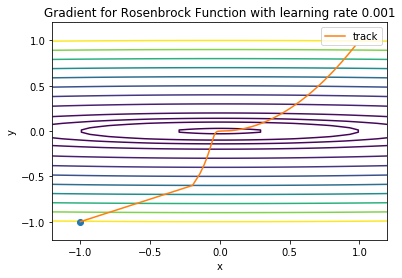

In [103]:
# GD

def draw_graph_2(iterations, learning_rate):

    x = np.linspace(-1.2, 1.2, 100)
    y = np.linspace(-1.2, 1.2, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
    Z = x**2 + 100*Y**2
    c = plt.contour(X, Y, Z, levels)

    x = np.matrix([[-1], [-1]])
    xv = [x[0, 0]]
    yv = [x[1, 0]]
    plt.plot(x[0, 0], x[1, 0], marker='o')

    grad_descent(x, iterations, learning_rate, xv, yv)
    plt.plot(xv, yv, label='track')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient for Rosenbrock Function with learning rate {lr}'.format(lr = learning_rate))
    plt.legend()
    plt.show()

    
draw_graph_2(6000, 0.001)
# draw_graph_2(6000, 0.002)
# draw_graph_2(6000, 0.003)
# draw_graph_2(6000, 0.004)

Text(0.5,1,'Gradieent descent with momentum')

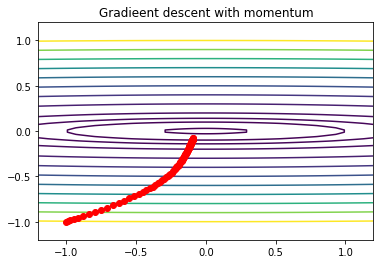

In [101]:
# GD with Momentum

def f2(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] * x[0]) ** 2

def grad2(x):
    return np.array([2 * x[0] - 2 + 400 * x[0] * (x[0] * x[0] - x[1]), 200 * (x[1] - x[0] * x[0])])

def gd2(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0,:] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1,:] = x
    return xs

def gd2_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1+beta**(i+1))
        x = x - alpha * vc
        xs[i+1, :] = x
    return xs


alpha = 0.0001
x0 = np.array([-1,-1])
xs = gd2_momentum(x0, grad2, alpha, beta=0.8, max_iter=100)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
plt.title('Gradieent descent with momentum')